In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fp
from PIL import Image

In [174]:
def SpatialFilters (image, n):
    image = image.convert('L')
    width, height = image.size
    half_w = int(width/2)
    half_h = int(height/2)
    FTr = fp.fft2(image)
    fshift = np.fft.fftshift(FTr) ## shift for centering 0.0 (x,y)

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    filter_high_pass = fp.fftshift(F1)
    filter_high_pass[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0
    high_pass = fp.ifft2(fp.ifftshift(filter_high_pass)).real


    filter_low_pass = fp.fftshift(F1)
    filter_low_pass[0:,0:half_h-n] = 0; filter_low_pass[0:,half_h+n+1:] = 0
    filter_low_pass[0:half_w-n, 0:] = 0; filter_low_pass[half_w+n+1:, 0:] = 0
    low_pass = fp.ifft2(fp.ifftshift(filter_low_pass)).real

    #Plotting 
    plt.figure(figsize=(10,10))
    plt.subplot(231); plt.imshow(image, cmap = 'gray')
    plt.title('Original Image'); plt.axis('off')

    plt.subplot(232); plt.imshow(high_pass, cmap='gray')
    plt.title('High-Pass Filtered'); plt.axis('off')

    plt.subplot(233); plt.imshow(low_pass, cmap='gray')
    plt.title('Low-Pass Filtered'); plt.axis('off')

    plt.subplot(234),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.axis('off')

    plt.subplot(235); plt.imshow( (20*np.log10( 0.1 + filter_high_pass)).astype(int))
    plt.title('High Pass Filter'), plt.axis('off')

    plt.subplot(236); plt.imshow((20*np.log10( 0.1 + filter_low_pass)).astype(int))
    plt.title('Low Pass Filter'), plt.axis('off')

    plt.tight_layout()
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


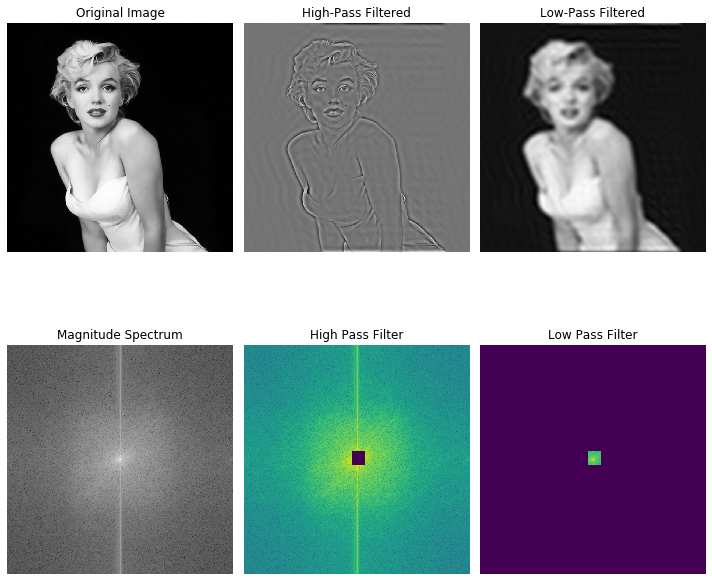

In [179]:
#TEST 
image = Image.open('Marilyn_Monroe.jpg') #Making image black and white
n = 25 #Define the width and height of the filters 
SpatialFilters (image, n)